In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt

In [3]:
(X_train , y_train) , (X_test , y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5] #Since this is an 2d array what we need is just the values 6 or 9 which are actually index so we need to reshape this array or y_train

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
#Reshaping y_train
y_train = y_train.reshape(-1 , )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ['airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

In [8]:
def plot_sample(X , y , index):
  plt.figure(figsize = (15,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])

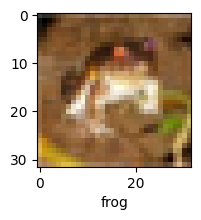

In [9]:
plot_sample(X_train , y_train , 0)

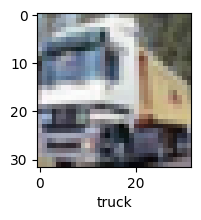

In [10]:
plot_sample(X_train , y_train , 1)

In [11]:
#Normalizing our data we need to divide each pixel value by 255 to make it in 0 to 1 range
X_train = X_train / 255
X_test = X_test / 255

In [12]:
#Building first a simple ANN
ann = models.Sequential([
                         layers.Flatten(input_shape = (32,32 ,3)) ,
                         layers.Dense(3000 , activation = 'relu') ,
                          layers.Dense(1000 , activation = 'relu') ,
                         layers.Dense(10 , activation = 'sigmoid') ,
])

ann.compile(optimizer = 'SGD' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

ann.fit(X_train , y_train , epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 137s 87ms/step - loss: 1.8140 - accuracy: 0.3551
Epoch 2/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.6252 - accuracy: 0.4266
Epoch 3/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.5426 - accuracy: 0.4547
Epoch 4/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.4835 - accuracy: 0.4777
Epoch 5/5
1563/1563 [==============================] - 136s 87ms/step - loss: 1.4344 - accuracy: 0.4978


In [1]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification_report: \n' , classification_report(y_test , y_pred_classes))

NameError: ignored

In [ ]:
#Using CNN to improve the performance of the model
cnn = models.Sequential([
                         #cnn
                         layers.Conv2D(filters = 32 , kernel_size = (3,3) , activation = 'relu' , input_shape = (32,32,3)),
                         layers.MaxPooling2D((2,2)) ,

                         layers.Conv2D(filters = 64 , kernel_size = (3,3) , activation = 'relu' , input_shape = (32,32,3)),
                         layers.MaxPooling2D((2,2)) ,
                         #dense
                         layers.Flatten() ,
                         layers.Dense(64 , activation = 'relu') ,
                         layers.Dense(10 , activation = 'softmax') ,
])

cnn.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
cnn.fit(X_train , y_train , epochs = 10)



Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.4640 - accuracy: 0.4761
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1124 - accuracy: 0.6108
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9718 - accuracy: 0.6635
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8823 - accuracy: 0.6962
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8057 - accuracy: 0.7204
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7551 - accuracy: 0.7391
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7058 - accuracy: 0.7538
Epoch 8/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6603 - accuracy: 0.7710
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6225 - accuracy: 0.7834
Epoch 10/10
1563/1563 [==============================] - 65s 42m

In [ ]:
cnn.evaluate(X_test , y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9200 - accuracy: 0.7011


[0.9200235605239868, 0.7010999917984009]

In [ ]:
y_test = y_test.reshape(-1 , )
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

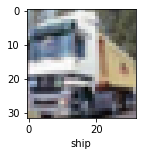

In [ ]:
plot_sample(X_test , y_test , 1)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.85685732e-04, 1.04895689e-05, 3.76012945e-03, 9.04608965e-01,
        5.42754424e-04, 2.71794498e-02, 3.54033783e-02, 9.45010197e-06,
        2.74954010e-02, 7.04255188e-04],
       [1.99415139e-03, 3.61444405e-03, 9.39103188e-07, 2.19365006e-07,
        1.24997150e-08, 4.31651381e-10, 6.65143807e-09, 1.20582366e-09,
        9.94358122e-01, 3.21242223e-05],
       [1.05923815e-02, 7.18156472e-02, 4.06888612e-05, 5.28935343e-04,
        2.16466637e-04, 3.58743855e-05, 4.63117030e-05, 6.70333029e-05,
        9.15794671e-01, 8.62029963e-04],
       [5.66771746e-01, 1.14867955e-01, 1.47027941e-02, 1.60880499e-02,
        2.60233437e-03, 1.52713528e-05, 1.25825554e-02, 7.67092206e-05,
        2.71941632e-01, 3.50932387e-04],
       [9.90000444e-07, 4.32061142e-06, 2.51797680e-02, 8.09247233e-03,
        2.90486872e-01, 1.98703114e-04, 6.75983131e-01, 1.04917103e-06,
        3.09480820e-05, 2.17707275e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:20]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 9, 0, 9, 5, 7, 9, 8, 5, 3, 8, 6]

In [ ]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

In [ ]:
classes[y_classes[1]]

'ship'

In [ ]:
print('Classification report: \n' , classification_report(y_test , y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.69      0.79      0.74      1000
           1       0.89      0.75      0.81      1000
           2       0.66      0.54      0.59      1000
           3       0.50      0.57      0.53      1000
           4       0.59      0.73      0.65      1000
           5       0.68      0.51      0.58      1000
           6       0.70      0.84      0.76      1000
           7       0.83      0.66      0.73      1000
           8       0.79      0.82      0.80      1000
           9       0.79      0.80      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



AttributeError: ignored

In [ ]:
tf.saved_model.save(cnn , "saved_model_keras_dir")
converter = tf.lite.TFLiteConverter.from_keras_model(cnn)
tflite_model = converter.convert()

# Save the model.
with open('cnn.tflite', 'wb') as f:
  f.write(tflite_model)


INFO:tensorflow:Assets written to: saved_model_keras_dir/assets
INFO:tensorflow:Assets written to: /tmp/tmpycqh7imu/assets


In [ ]:
import os

def recreate_labels():
  # 1) We use this in order to ignore any hidden files that might be here.
  # 'Datasets' is the name of the folder where we store our training data. The 'listdir' is used to fetch all the folder names.
  labels = [folder for folder in datasets.cifar10.load_data()]

  # 2) Then, we output the contents of each folder name to a file.
  with open('labels.txt', 'w') as file:
    for label in labels:
      file.write(label)
      file.write('\n')

recreate_labels()

#os.listdir('datasets') if not folder.startswith('.')

TypeError: ignored